In [6]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from helper_fun import cross_entropy, fidelity

f = open('./benchmark_data/supremacy/quantum_plotter_input_ibmq_boeblingen_supremacy_sametotal.p', 'rb' )
plotter_input = pickle.load(f)
print(plotter_input.keys())

dict_keys([(2, 3), (4, 8)])


In [7]:
case = (4,8)
plotter_input = plotter_input[case]
print(plotter_input.keys())
ce_percent_change = plotter_input['ce_percent_reduction']
fid_percent_change = plotter_input['fid_percent_improvement']
circ = plotter_input['full_circ']
d1 = plotter_input['evaluations']['sv_noiseless']
d2 = plotter_input['evaluations']['qasm']
d3 = plotter_input['evaluations']['qasm+noise']
d4 = [abs(x) for x in plotter_input['evaluations']['cutting']]
std_fid = fidelity(target=d1,obs=d3)
cutting_fid = fidelity(target=d1,obs=d4)
print('std fid = %.3f, cutting fid = %.3f'%(std_fid,cutting_fid))
print('ce:',ce_percent_change,'fid:',fid_percent_change)

dict_keys(['full_circ', 'fc_shots', 'searcher_time', 'clusters', 'complete_path_map', 'classical_time', 'quantum_time', 'all_cluster_prob', 'evaluations', 'ce_percent_reduction', 'fid_percent_improvement', 'uniter_time'])
std fid = 1.000, cutting fid = 1.000
ce: 62.20614252355889 fid: -5.551115123125783e-14


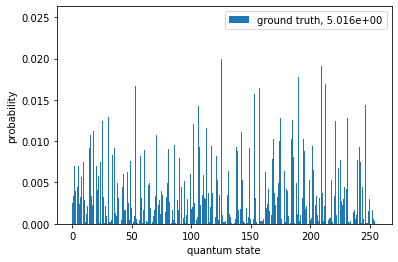

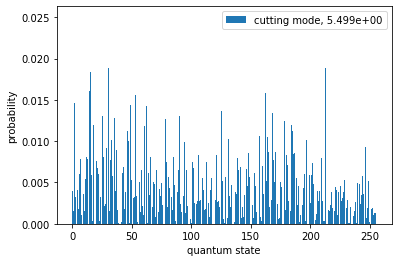

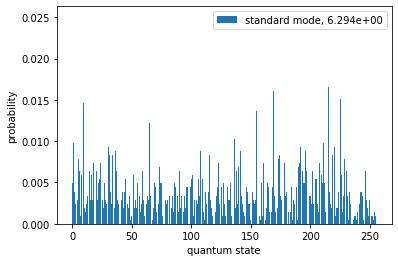

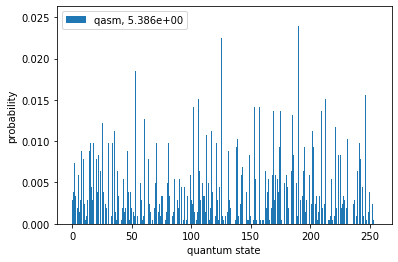

In [8]:
plot_range = min(1024,len(d1))
x = np.arange(len(d1))[:plot_range]
y_lim = 0
for d in [d1,d2,d3,d4]:
    y_lim = max(y_lim,max(d))
y_lim *= 1.1

plt.figure()
plt.bar(x,height=d1[:plot_range],label='ground truth, %.3e'%cross_entropy(d1,d1))
plt.ylim(0,y_lim)
plt.xlabel('quantum state')
plt.ylabel('probability')
plt.legend()
plt.show()
# plt.savefig('ground_truth_eg.png',dpi=400)

plt.figure()
plt.bar(x,height=d4[:plot_range],label='cutting mode, %.3e'%cross_entropy(d1,d4))
plt.ylim(0,y_lim)
plt.xlabel('quantum state')
plt.ylabel('probability')
plt.legend()
plt.show()
# plt.savefig('cutting_eg.png',dpi=400)

plt.figure()
plt.bar(x,height=d3[:plot_range],label='standard mode, %.3e'%cross_entropy(d1,d3))
plt.ylim(0,y_lim)
plt.xlabel('quantum state')
plt.ylabel('probability')
plt.legend()
plt.show()
# plt.savefig('vanilla_execution_eg.png',dpi=400)

plt.figure()
plt.bar(x,height=d2[:plot_range],label='qasm, %.3e'%cross_entropy(d1,d2))
plt.ylim(0,y_lim)
plt.xlabel('quantum state')
plt.ylabel('probability')
plt.legend()
plt.show()